In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
#this function calculates the air density due altitude and gravity with international atmosphere model(for first layer of atmosphere)
def airdensity(altitude,g): 
    T0 = 288.15  # sea level temperature, K
    rho0 = 1.225  # sea level density, kg/m^3
    L = 0.0065   # temperature lapse rate, K/m
    R = 287.1    # specific gas constant, J/(kg*K)

    # calculate temperature at altitude
    T = T0 - L * altitude

    # calculate pressure at altitude
    p = 101325 * (T/T0)**(g/(L*R))

    # calculate air density at altitude
    rho = p/(R*T)

    return rho


In [34]:
#this function calculates the air resistance using air density, reynold number, cross sectional area of rocket, instant velocity and mass)
def air_resistance(rho,Cd,A,velocity,mass):
    Cd=0.5*rho*A*D
    drag=((Cd*velocity**2)/mass) if velocity>0 else -((Cd*velocity**2)/mass)
    return drag


In [35]:
wetmass=2 #starting mass with full propellant in kg
propellant=0.94 #mass of total propellant in kg
burntime=3.6 #burning time of motor in seconds
totalimpulse=200.4 #the total impulse value that motor can produce with containing propellant in kg.m/s
A=0.01 #the cross sectional area of rocket
D=0.75 #drag constant for sylindirical rocket


drymass=wetmass-propellant # the final mass with no fuel in kg
averagethrust=totalimpulse/burntime #average thrust which motor can produce in kg.m/s^2
massflowrate=propellant/burntime #this variable calculates mass of consumed fuel/time in kg/s

time=np.linspace(0,10,1000, False) #generating time vector


#defining variables
thrust=np.zeros(len(time)) #thrust vector
mass=np.zeros(len(time)) #mass vector
acceleration=np.zeros(len(time)) #acceleration vector
velocity=np.zeros(len(time)) #velocity vector
altitude=np.zeros(len(time)) #altitude vector
gravity=np.zeros(len(time)) # gravity vector
rho=np.zeros(len(time)) # air denstity vector

#setting initial values
thrust[0]=averagethrust 
mass[0]=wetmass
gravity[0]=((6.6743 * 10**(-11) * 5.9721 * 10**24) / (6371000)**2)
acceleration[0]=thrust[0]/mass[0] - gravity[0]
rho[0]=airdensity(altitude[0],gravity[0])


In [36]:
#this loop calculating acceleration, velocity, altitude and gravity with iterating
for i in range(1, len(time)):
    #declaring dt and dh
    dt=time[i]-time[i-1]
    dh=velocity[i-1]*dt+acceleration[i-1]* dt**2 #the displacement in dt
   
    #calculating air density with air_density function
    rho[i]=airdensity(altitude[i],gravity[i])     
    
    #updating altitude and gravity
    altitude[i]=altitude[i-1]+dh #adding displacement made in a small time to the altitude
    gravity[i]=((6.6743 * 10**(-11) * 5.9721 * 10**24) / (6371000 + altitude[i])**2) #updating gravity using new altitude
    
    #calculating thrust, mass and acceleration
    thrust[i]=(averagethrust if time[i]<burntime else 0) #thrust is equal to average thrust until burntime ends.(thrust is 0 if there is no burn)
    
    mass[i]=(wetmass-time[i]*massflowrate if time[i]<burntime else drymass) #updating mass 

    #acceleration calculation uses instantaneous thurst, mass, gravity, air density, velocity for better result.
    acceleration[i]=thrust[i]/mass[i]-gravity[i]-air_resistance(rho [i],Cd,A,velocity[i-1],mass[i])
  
    #calculating velocity with trapezoid rule
    velocity[i]=velocity[i-1]+0.5*(acceleration[i-1]+acceleration[i])*dt
    
    #setting setting negative values of altitude to 0
altitude = np.maximum(altitude, 0)
    #declaring variable ground which is where altitude is equal 0
ground=np.where(altitude==0)
    
    #setting velocity and acceleration 0, where rocket is on the ground.
velocity[ground]=0
acceleration[ground]=0

[  0.          18.04958095  18.08598682  18.1223376   18.15863217
  18.1948694   18.23104814  18.26716724  18.30322557  18.33922196
  18.37515525  18.41102427  18.44682784  18.4825648   18.51823394
  18.55383409  18.58936404  18.6248226   18.66020854  18.69552067
  18.73075776  18.76591858  18.80100192  18.83600652  18.87093115
  18.90577456  18.94053551  18.97521273  19.00980496  19.04431094
  19.07872938  19.11305902  19.14729857  19.18144674  19.21550224
  19.24946376  19.28333001  19.31709968  19.35077146  19.38434402
  19.41781604  19.45118619  19.48445315  19.51761558  19.55067212
  19.58362145  19.6164622   19.64919302  19.68181256  19.71431944
  19.7467123   19.77898977  19.81115046  19.84319301  19.87511601
  19.9069181   19.93859786  19.97015391  20.00158484  20.03288925
  20.06406573  20.09511287  20.12602926  20.15681347  20.18746408
  20.21797967  20.24835881  20.27860006  20.308702    20.33866317
  20.36848215  20.39815748  20.42768772  20.45707142  20.48630712
  20.51539

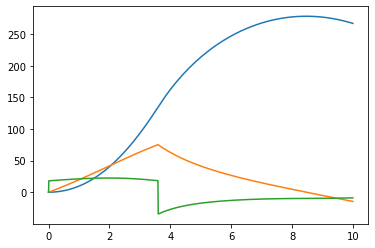

In [37]:
#plotting

plt.plot(time,altitude)
plt.plot(time,velocity)
plt.plot(time,acceleration)

print(acceleration)
print(velocity)